*This is my first code in kaggle. Seeking improvment advices. 
If you like, please upvote :) Thank you *

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("../input/zomato.csv")

In [ ]:
print(df.columns)
print(df.shape)

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
#check null values and how much they are
null_data = pd.DataFrame({'Column':[i.capitalize() for i in df.columns], 'Count':df.isnull().sum().values, 'Percentage':((df.isnull().sum().values*100)/len(df)).round(2)})

In [ ]:
null_data

In [ ]:
df.rate = df.rate.str.replace('/5', '')
df = df.rename(columns = {'approx_cost(for two people)':'approx_cost'})

** Total Resturant**

In [ ]:
print("There are {} resturants across {} locations in Bangalore".format(len(df.name.unique()), len(df.location.unique())))

** Resturant in Different Locations ****

In [ ]:
location_count  = df['location'].value_counts()

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(location_count.index[:25], location_count[:25].values)
plt.xticks(rotation=90, fontsize=12)
plt.title("Resturanat in Particular Area", fontsize=15)
plt.ylabel("Count of Resturant", fontsize=15)
plt.xlabel("Area", fontsize=15)
plt.show()

In [ ]:
df = df.rename(columns={'listed_in(type)':'Resturant_Type', 'listed_in(city)':'Locality'})

In [ ]:
df.columns

**Type of Resturant**

In [ ]:
count_rest = df.Resturant_Type.value_counts()
#print count_rest.values
#print count_rest.index
plt.figure(figsize=(18, 12))
plt.pie(count_rest, labels=count_rest.index, startangle=90, autopct='%.1f%%')
plt.title("Types of Resturant in City", fontsize=15)
plt.show()

**Best Possible Resturant for a middle class**

In [ ]:
df.approx_cost = pd.to_numeric(df.approx_cost, errors='coerce')

In [ ]:
df.dtypes

Good Resturant for Middle class people 
budget for two people will lie in 300 to 1000
having rating 4.0 and above 
votes above 100

In [ ]:
data_budget = df[(df.approx_cost>=300)&(df.approx_cost<=1000)&(df.rate>='4.0')&(df.votes>=100)]
ag = data_budget.groupby(['approx_cost', 'name', 'location', 'cuisines'], as_index=True).agg({'votes':sum})
g = ag['votes'].groupby(level=0, group_keys=False)
g.nlargest(5)

Here we can select the resturant among top 5 in our budget. 

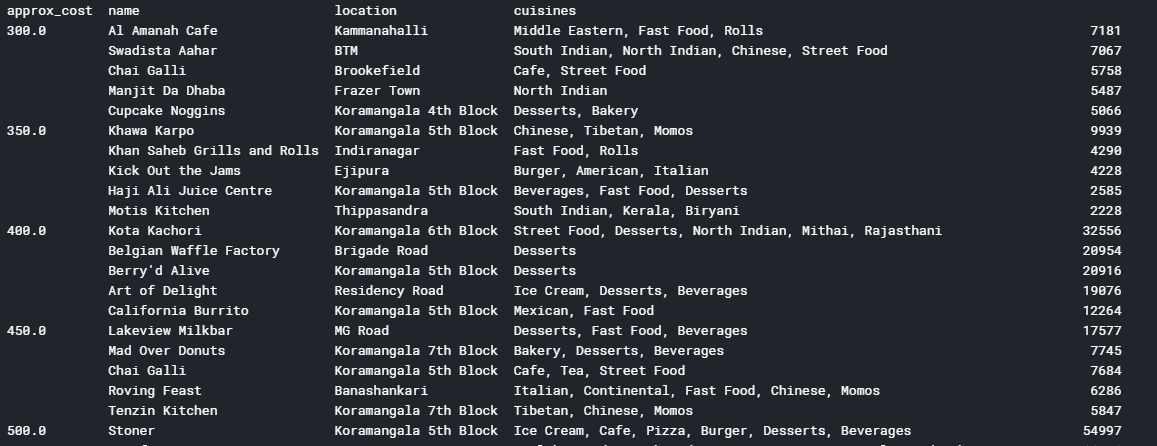

The above results shows that we can chosse any resturant from top 5 in budget 
Like if budget is 300, 350, 400, 450 and more 